In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex
import re

HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_stepwise") 
files = [#'uniform.csv', 
         #'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         #'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

In [3]:
# Turn a workload object string into a list of probabilities
def extract_probabilities(workload_str): 
    pattern = r"=\s*([-+]?\d*\.\d+|\d+)"
    return [float(num) for num in re.findall(pattern, workload_str)]

## Grouping by True Rho

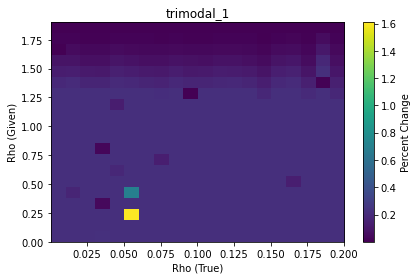

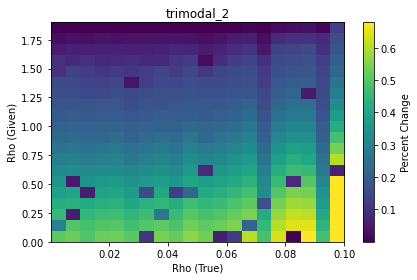

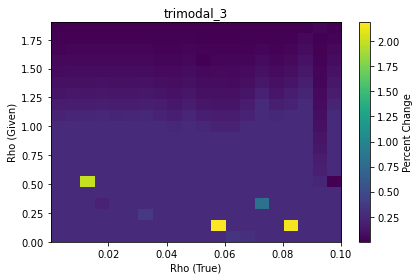

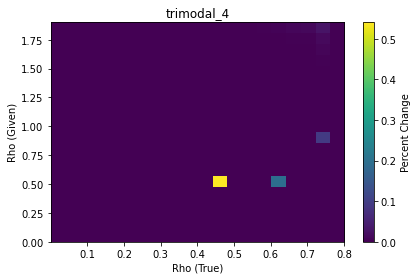

In [4]:
for file in files: 
    df = pd.read_csv(file)
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    df = df.sort_values(by=['Rho', 'Rho (True)'])
    rho_values = np.sort(df['Rho'].unique())
    rho_true_values = np.sort(df['Rho (True)'].unique())
    cost_matrix = np.zeros((len(rho_values), len(rho_true_values)))
    
    # create matrix for the heatmap 
    for i, rho in enumerate(rho_values):
        for j, rho_true in enumerate(rho_true_values):
            percent_change = df[(df['Rho'] == rho) & (df['Rho (True)'] == rho_true)]['Percent Change'].values
            if len(percent_change) > 0:
                cost_matrix[i, j] = percent_change[0]

    # plot heat map 
    fig, ax = plt.subplots()
    im = ax.imshow(cost_matrix, extent=[min(rho_true_values), round(max(rho_true_values), 1), min(rho_values), max(rho_values)])
    cbar = fig.colorbar(im)
    ax.set_aspect('auto')
    
    # labels
    cbar.set_label('Percent Change')  
    ax.set_title(file.split('.')[0])
    ax.set_xlabel("Rho (True)")  
    ax.set_ylabel("Rho (Given)") 
    fig.tight_layout()
    plt.show()

I think all we can say is yellow areas in lower $\rho$ (given) values are areas where the neighborhood does not include the original workload. 

## Grouping by Epsilon

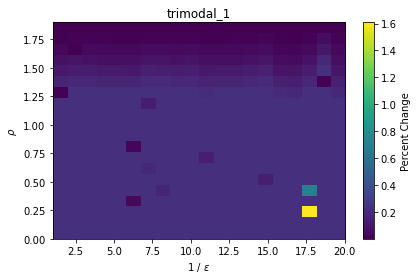

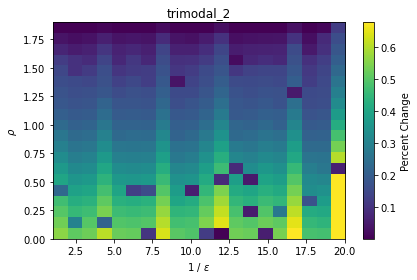

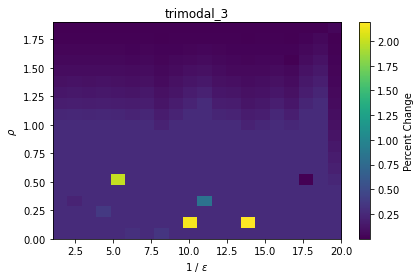

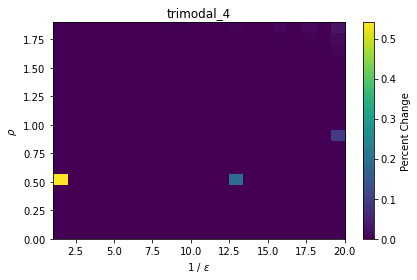

In [5]:
for file in files: 
    df = pd.read_csv(file)
    df = df.sort_values(by=['Rho', 'Epsilon'])
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    df['Epsilon'] = df['Epsilon'].apply(lambda x: 1/x)
    rho_values = np.sort(df['Rho'].unique())
    epsilon_invert = np.sort(df['Epsilon'].unique())
    cost_matrix = np.zeros((len(rho_values), len(epsilon_invert)))
    
    # create matrix for the heatmap 
    for i, rho in enumerate(rho_values):
        for j, epsilon in enumerate(epsilon_invert):
            percent_change = df[(df['Rho'] == rho) & (df['Epsilon'] == epsilon)]['Percent Change'].values
            if len(percent_change) > 0:
                cost_matrix[i, j] = percent_change[0]

    # plot heat map 
    fig, ax = plt.subplots()
    im = ax.imshow(cost_matrix, extent=[min(epsilon_invert), round(max(epsilon_invert), 1), min(rho_values), max(rho_values)])
    cbar = fig.colorbar(im)
    ax.set_aspect('auto')
    
    # labels
    cbar.set_label('Percent Change')  
    ax.set_title(file.split('.')[0])
    ax.set_xlabel(r"1 / $\varepsilon$")  
    ax.set_ylabel(r"$\rho$") 
    fig.tight_layout()
    plt.show()